## Tugas Besar IF2220 Probabilitas dan Statistika

Disusun oleh:
1. Sharon Bernadetha Marbun (13519092)
2. Nabelanita Utami (13519104)

### Daftar Isi
1. [Deskripsi Statistika](#1.-Deskripsi-Statistika)<br>
2. [Visualisasi Kolom Distribusi](#2.-Visualisasi-Kolom-Distribusi)<br>
3. [Normality Test](#3.-Normality-Test)<br>
4. [Tes Hipotesis 1 Sampel](#-4.-Tes-Hipotesis-1-Sampel)<br>
5. [Tes Hipotesis 2 Sampel](#-5.-Tes-Hipotesis-2-Sampel)<br>
6. [Tes korelasi](#6.-Tes-Korelasi)<br>

### 1. Deskripsi Statistika

In [142]:
import pandas as pd
import scipy
import scipy.stats as st
from scipy import stats
import matplotlib.pyplot as plt
import random
import statistics
from IPython.display import display, Markdown
data = pd.read_csv('Gandum.csv')

In [2]:
display(Markdown("__Beberapa data statistik:__"))
df = data[data.columns[1:11]]
stats = df.describe().loc[['mean']]
stats.loc['med'] = df.describe().loc['50%'].tolist()
#stats.loc['mode'] = df.mode()[:1].max().tolist()
stats.loc['std'] = df.std().tolist()
stats.loc['var'] = df.var().tolist()
stats.loc['range'] = (df.max() - df.min()).tolist()
stats = stats.append(df.describe().loc[['min','max','25%','50%','75%']])
stats.loc['iqr'] = (stats.loc['75%'] - stats.loc['25%']).tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)


__Beberapa data statistik:__

              Daerah  SumbuUtama  SumbuKecil  Keunikan   AreaBulatan  \
mean     4801.246000  116.045171   53.715246  0.878764  4.937048e+03   
med      4735.000000  115.405140   53.731199  0.890045  4.857000e+03   
std       986.395491   18.282626    4.071075  0.036586  1.011696e+03   
var    972976.065615  334.254412   16.573650  0.001339  1.023529e+06   
range    4931.000000  153.795469   29.071182  0.194085  5.141000e+03   
min      2522.000000   74.133114   39.906517  0.719916  2.579000e+03   
max      7453.000000  227.928583   68.977700  0.914001  7.720000e+03   
25%      4042.750000  104.116098   51.193576  0.863676  4.170250e+03   
50%      4735.000000  115.405140   53.731199  0.890045  4.857000e+03   
75%      5495.500000  129.046792   56.325158  0.907578  5.654250e+03   
iqr      1452.750000   24.930694    5.131582  0.043902  1.484000e+03   
skew        0.238144    0.761529   -0.010828 -1.623472  2.575600e-01   
kurt       -0.434631    4.330534    0.475568  2.917256 -4.096849

__Legenda:__ <br>
mean	: mean <br>
med	    : median<br>
std	    : standar deviasi<br>
var	    : variansi<br>
range	: range<br>
min	: nilai minimum<br>
max	: nilai maksimum<br>
25%	: kuartil 1<br>
50%	: kuartil 2<br>
75%	: kuartil 3<br>
iqr	: IQR<br>
skew	: skewness<br>
kurt	: kurtosis<br>

In [3]:
display(Markdown("__Data modus:__ "))
df.mode()

__Data modus:__ 

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
0,3992.0,74.133114,39.906517,0.719916,3802.0,71.293564,0.735849,197.015,0.174590,1.440796
1,4881.0,74.364021,41.436419,0.725553,4913.0,78.833256,0.824405,200.587,0.261297,1.453137
2,5642.0,74.691881,42.871879,0.731211,NaN,84.756224,NaN,202.456,0.299298,1.465950
3,6083.0,76.293164,43.284979,0.738639,NaN,88.006342,NaN,207.325,0.589146,1.483456
4,NaN,76.789043,44.119355,0.749282,NaN,NaN,NaN,207.697,0.603807,1.510000
...,...,...,...,...,...,...,...,...,...,...
495,NaN,152.068440,63.322854,0.913724,NaN,NaN,NaN,375.651,0.872417,2.461017
496,NaN,152.113491,63.762307,0.913760,NaN,NaN,NaN,390.125,0.874243,2.461510
497,NaN,153.583387,64.012769,0.913891,NaN,NaN,NaN,434.235,0.874743,2.463297
498,NaN,227.105462,65.738475,0.913909,NaN,NaN,NaN,448.305,0.891706,2.463546


### 2. Visualisasi Kolom Distribusi

#### Kolom Daerah

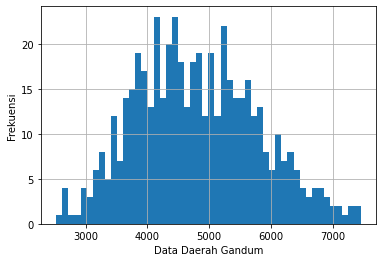

In [185]:
data['Daerah'].hist(bins=50)
plt.xlabel("Data Daerah Gandum")
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Distribusi data condong ke nilai-nilai yang lebih kecil karena skewness positif

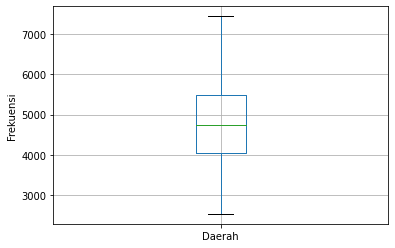

In [186]:
data.boxplot(column=['Daerah'], return_type='axes');
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Boxplot menunjukan mean dari data yang nilainya lebih besar dari median serta tidak adanya pecilan

#### Kolom SumbuUtama

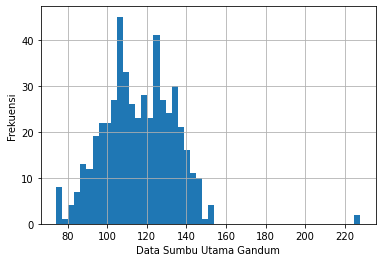

In [187]:
data['SumbuUtama'].hist(bins=50)
plt.xlabel("Data Sumbu Utama Gandum")
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Distribusi data condong ke nilai-nilai yang lebih kecil karena skewness positif

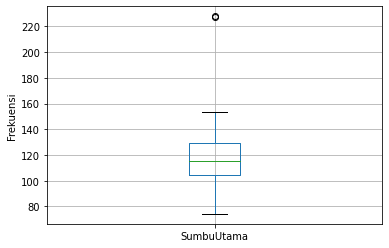

In [188]:
data.boxplot(column=['SumbuUtama'], return_type='axes')
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Boxplot menunjukkan mean dari data memiliki nilai yang lebih besar dari median dan tidak terdapat pecilan

#### Kolom SumbuKecil

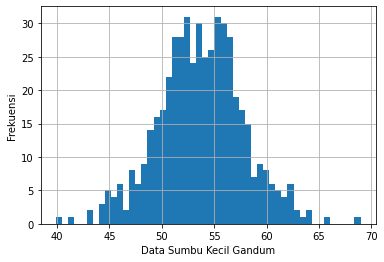

In [189]:
data['SumbuKecil'].hist(bins=50)
plt.xlabel("Data Sumbu Kecil Gandum")
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Skewness data simetris sehingga nilai mean dan median sama

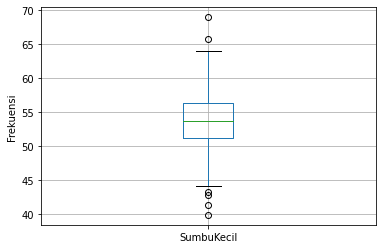

In [190]:
data.boxplot(column=['SumbuKecil'], return_type='axes')
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Mean dari data memiliki nilai yang sama dengan median dan terdapat pecilan

#### Kolom Keunikan

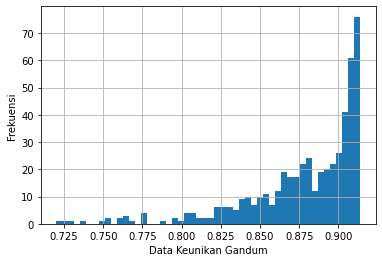

In [191]:
data['Keunikan'].hist(bins=50)
plt.xlabel("Data Keunikan Gandum")
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Skewness data negatif sehingga distribusi data condong ke nilai yang besar

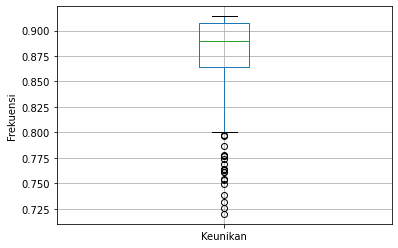

In [193]:
data.boxplot(column=['Keunikan'], return_type='axes')
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Mean dari data memiliki nilai yang lebih kecil dari median dan terdapat pecilan

#### Kolom AreaBulatan

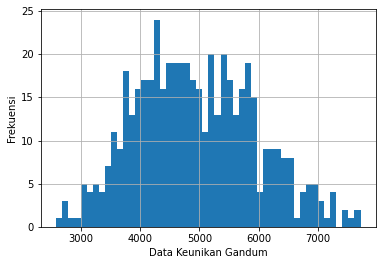

In [194]:
data['AreaBulatan'].hist(bins=50)
plt.xlabel("Data Keunikan Gandum")
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Distribusi data condong ke nilai-nilai yang lebih kecil karena skewness positif

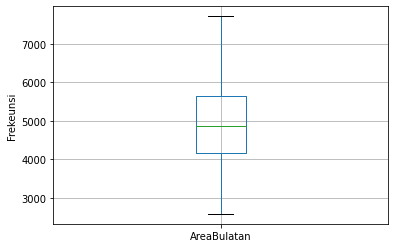

In [195]:
data.boxplot(column=['AreaBulatan'], return_type='axes')
plt.ylabel("Frekeunsi")
plt.show()

Interpretasi: Boxplot menunjukan mean dari data memiliki nilai yang lebih besar dari median dan tidak terdapat pecilan

#### Kolom Diameter

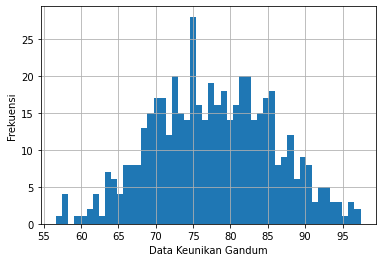

In [196]:
data['Diameter'].hist(bins=50)
plt.xlabel("Data Keunikan Gandum")
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Skewness data simetris sehingga distribusi data condong pada nilai tengah

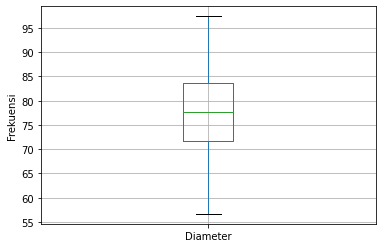

In [198]:
data.boxplot(column=['Diameter'], return_type='axes')
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Boxplot menunjukan mean dari data memiliki nilai yang sama dengan median dan tidak terdapat pecilan

#### Kolom KadarAir

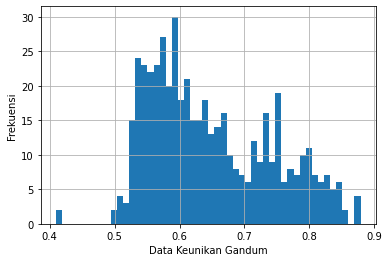

In [199]:
data['KadarAir'].hist(bins=50)
plt.xlabel("Data Keunikan Gandum")
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Distribusi data condong ke nilai-nilai yang lebih kecil karena skewness positif

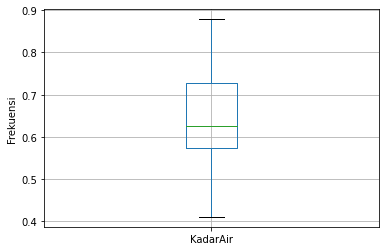

In [201]:
data.boxplot(column=['KadarAir'], return_type='axes')
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Boxplot menunjukan mean dari data memiliki nilai yang lebih besar dari median dan tidak terdapat pecilan

#### Kolom Keliling 

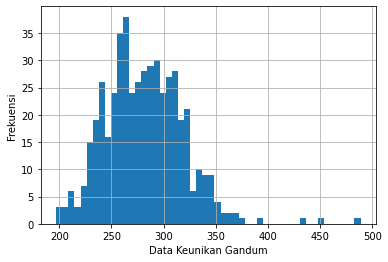

In [202]:
data['Keliling'].hist(bins=50)
plt.xlabel("Data Keunikan Gandum")
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Distribusi data condong ke nilai-nilai yang lebih kecil karena skewness positif

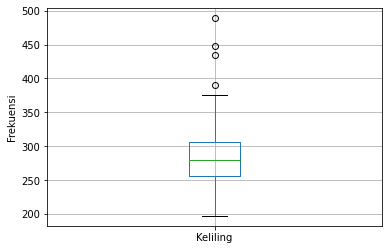

In [203]:
data.boxplot(column=['Keliling'], return_type='axes')
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Boxplot menunjukan mean dari data memiliki nilai yang lebih besar dari median dan tidak terdapat pecilan

#### Kolom Bulatan

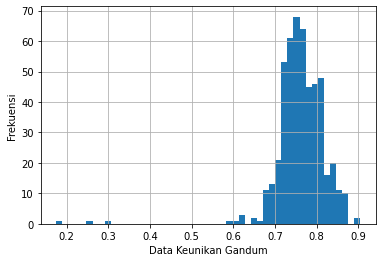

In [204]:
data['Bulatan'].hist(bins=50)
plt.xlabel("Data Keunikan Gandum")
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Skewness data negatif sehingga distribusi data condong ke nilai yang besar

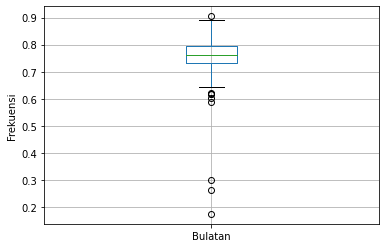

In [205]:
data.boxplot(column=['Bulatan'], return_type='axes')
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Mean dari data memiliki nilai yang lebih kecil dari median dan terdapat pecilan

#### Kolom Ransum

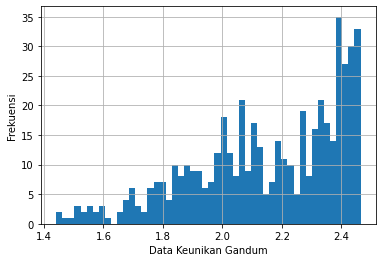

In [206]:
data['Ransum'].hist(bins=50)
plt.xlabel("Data Keunikan Gandum")
plt.ylabel("Frekuensi")
plt.show()

Interpretasi: Skewness data negatif sehingga distribusi data condong ke nilai yang besar

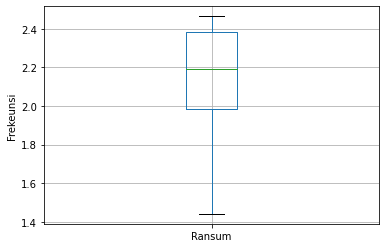

In [207]:
data.boxplot(column=['Ransum'], return_type='axes')
plt.ylabel("Frekeunsi")
plt.show()

Interpretasi: Mean dari data memiliki nilai yang lebih kecil dari median dan tidak terdapat pecilan

### 3. Normality Test

#### Kolom Daerah

In [208]:
w, p = stats.shapiro(data['Daerah'])
print("Hasil Shapiro-Wilk Normality Test")
print("")
print("W = {}" .format(w))
print("p = {}" .format(p))

Hasil Shapiro-Wilk Normality Test

W = 0.9907860159873962
p = 0.003270698245614767


Analisis: Data tidak berdistribusi normal dan hal ini dapat dilihat dari histogram plot yang menunjukkan skewness positif yang menunjukkan median lebih kecil dari mean, artinya tidak berdistribusi normal.

#### Kolom SumbuUtama

In [209]:
w, p = stats.shapiro(data['SumbuUtama'])
print("Hasil Shapiro-Wilk Normality Test")
print("")
print("W = {}" .format(w))
print("p = {}" .format(p))

Hasil Shapiro-Wilk Normality Test

W = 0.9513812065124512
p = 9.236201213569384e-12


Analisis: Data tidak berdistribusi normal dan hal ini dapat dilihat dari histogram plot yang menunjukkan skewness positif yang menunjukkan median lebih kecil dari mean, artinya tidak berdistribusi normal.

#### Kolom SumbuKecil

In [210]:
w, p = stats.shapiro(data['SumbuKecil'])
print("Hasil Shapiro-Wilk Normality Test")
print("")
print("W = {}" .format(w))
print("p = {}" .format(p))

Hasil Shapiro-Wilk Normality Test

W = 0.996778666973114
p = 0.4234558641910553


Analisis: Data berdistribusi normal dan hal ini dapat dilihat dari histogram plot yang memiliki skewness simetris.

#### Kolom Keunikan

In [211]:
w, p = stats.shapiro(data['Keunikan'])
print("Hasil Shapiro-Wilk Normality Test")
print("")
print("W = {}" .format(w))
print("p = {}" .format(p))

Hasil Shapiro-Wilk Normality Test

W = 0.8309029340744019
p = 1.3151663082081454e-22


Analisis: Data tidak berdistribusi normal dan hal ini dapat dilihat dari histogram yang memiliki skewness negatif sehingga median lebih besar daripada mean.

#### Kolom AreaBulatan

In [212]:
w, p = stats.shapiro(data['AreaBulatan'])
print("Hasil Shapiro-Wilk Normality Test")
print("")
print("W = {}" .format(w))
print("p = {}" .format(p))

Hasil Shapiro-Wilk Normality Test

W = 0.990435779094696
p = 0.0024847122840583324


Analisis: Data tidak berdistribusi normal dan hal ini dapat dilihat dari histogram plot yang menunjukkan skewness positif yang menunjukkan median lebih kecil dari mean, artinya tidak berdistribusi normal.

#### Kolom Diameter

In [213]:
w, p = stats.shapiro(data['Diameter'])
print("Hasil Shapiro-Wilk Normality Test")
print("")
print("W = {}" .format(w))
print("p = {}" .format(p))

Hasil Shapiro-Wilk Normality Test

W = 0.9951366186141968
p = 0.11834503710269928


Analisis: Data berdistribusi normal dan hal ini dapat dilihat dari histogram plot yang memiliki skewness simetris.

#### Kolom KadarAir

In [214]:
w, p = stats.shapiro(data['KadarAir'])
print("Hasil Shapiro-Wilk Normality Test")
print("")
print("W = {}" .format(w))
print("p = {}" .format(p))

Hasil Shapiro-Wilk Normality Test

W = 0.9466671347618103
p = 1.959499836695633e-12


Analisis: Data tidak berdistribusi normal dan hal ini dapat dilihat dari histogram plot yang menunjukkan skewness positif yang menunjukkan median lebih kecil dari mean, artinya tidak berdistribusi normal.

#### Kolom Keliling 

In [215]:
w, p = stats.shapiro(data['Keliling'])
print("Hasil Shapiro-Wilk Normality Test")
print("")
print("W = {}" .format(w))
print("p = {}" .format(p))

Hasil Shapiro-Wilk Normality Test

W = 0.9692449569702148
p = 9.728394090302572e-09


Analisis: Data tidak berdistribusi normal dan hal ini dapat dilihat dari histogram plot yang menunjukkan skewness positif yang menunjukkan median lebih kecil dari mean, artinya tidak berdistribusi normal.

#### Kolom Bulatan

In [216]:
w, p = stats.shapiro(data['Bulatan'])
print("Hasil Shapiro-Wilk Normality Test")
print("")
print("W = {}" .format(w))
print("p = {}" .format(p))

Hasil Shapiro-Wilk Normality Test

W = 0.7697757482528687
p = 6.899158691421287e-26


Analisis: Data berdistribusi normal dan hal ini dapat dilihat dari histogram yang memiliki skewness negatif sehingga median lebih besar daripada mean.

#### Kolom Ransum

In [217]:
w, p = stats.shapiro(data['Ransum'])
print("Hasil Shapiro-Wilk Normality Test")
print("")
print("W = {}" .format(w))
print("p = {}" .format(p))

Hasil Shapiro-Wilk Normality Test

W = 0.9265043139457703
p = 6.245541108888591e-15


Analisis: Data berdistribusi normal dan hal ini dapat dilihat dari histogram yang memiliki skewness negatif sehingga median lebih besar daripada mean.

### 4. Tes Hipotesis 1 Sampel

In [218]:
#DEKLARASI FUNGSI/PROSEDUR YANG DIBUTUHKAN
def getCPoint(alpha,opr):
    #menghitung titik kritis berdasarkan tabel distribusi normal
    if opr==">":
        cpoint = st.norm.ppf(1-alpha)
    elif opr=="<":
        cpoint = st.norm.ppf(alpha)
    elif opr=="!=":
        cpoint = st.norm.ppf(1-alpha/2)
    return cpoint

def criticalRegion(cpoint,opr):
    #menghasilkan daerah kritis
    if opr==">":
        display(Markdown("Derah kritis terletak pada z > " + str(cpoint) + "."))
        return 1 #mengembalikan kode 1
    elif opr=="<":
        display(Markdown("Derah kritis terletak pada z < " + str(cpoint) + "."))
        return 2 #mengembalikan kode 2
    elif opr=="!=":
        display(Markdown("Derah kritis terletak pada z < -" + str(cpoint) + " dan z > " + str(cpoint) + "."))
        return 3 #mengembalikan kode 3
    
def countZ(kol,mu):
    #menampilkan nilai x̄̅, σ, n, dan juga hasil perhitungan z 
    sample = data[kol]
    mean = sample.mean()
    print("x̄̅ = " + str(mean))
    std = sample.std()
    print("σ = " + str(std))
    count = sample.count()
    print("n = " + str(count))
    z = (mean-mu)/(std/(count**0.5)) 
    print("Maka, z = " + str(z) + ".")
    return z

def countPV(z,opr):
    #menghitung nilai p-value untuk z test
    if opr==">":
        pvalue = 1-st.norm.cdf(z)
        print("p-value = P(z > " + str(z) + ") = " + str(pvalue))
    elif opr=="!=":
            if z>0:
                pvalue = 2*(1-st.norm.cdf(z))
                print("p-value = 2P(z > " + str(z) + ") = " + str(pvalue))
            else: #z<=0
                pvalue = 2*st.norm.cdf(z)
                print("p-value = 2P(z < " + str(z) + ") = " + str(pvalue))
        
    elif opr=="<":
        pvalue = st.norm.cdf(z)
        print("p-value = P(z < " + str(z) + ") = " + str(pvalue))
    return pvalue

def cekZ(z,criticalRegion):
    #mengecek apakah z berada di daerah kritis dan menghasilkan keputusan
    masuk = False
    if criticalRegion == 1:
        if z > cpoint:
            masuk = True
    elif criticalRegion == 2:
        if z < cpoint:
            masuk = True
    elif criticalRegion == 3:
        if z < -cpoint or z > cpoint:
            masuk = True
    if (masuk):       
        display(Markdown("Karena z berada di daerah kritis, maka __$H_{0}$ ditolak.__"))
    else:
        display(Markdown("Karena z tidak berada pada daerah kritis, maka __$H_{0}$ diterima.__"))
                   
            
def cekP(p,alpha):
    #mengecek apakah p-value lebih kecil dari α dan menghasilkan keputusan
    if p<alpha:
        display(Markdown("Karena p-value < α, maka __$H_{0}$ ditolak.__"))
    else:
        display(Markdown("Karena p-value >= α, maka __$H_{0}$ diterima.__"))

#### 4.a. Pengujian Terhadap $μ_{Daerah} > 4700$

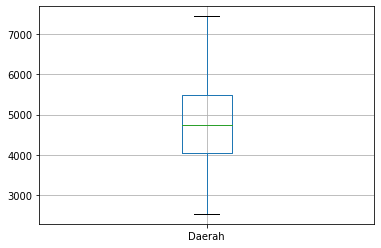

In [219]:
data.boxplot(["Daerah"])
plt.show()

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: μ_{Daerah} = 4700$ <br> 
2. Hipotesis alternatif $H_{1}: μ_{Daerah} > 4700$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Uji statistik menggunakan rumus pencarian nilai z sebagai berikut. <br>
$\;\;\;\;\;\;z= \Large\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt n}}$ <br>

In [220]:
alpha = 0.05
cpoint = getCPoint(alpha,">")
cRegion = criticalRegion(cpoint,">")

Derah kritis terletak pada z > 1.6448536269514722.

In [221]:
display(Markdown("5. Menghitung Nilai Uji Statistik z dan p-value"))
zdaerah = countZ("Daerah",4700)
pvalue = countPV(zdaerah,">")

5. Menghitung Nilai Uji Statistik z dan p-value

x̄̅ = 4801.246
σ = 986.3954914816017
n = 500
Maka, z = 2.2951538242525173.
p-value = P(z > 2.2951538242525173) = 0.010862155196799894


In [222]:
display(Markdown("6. Keputusan"))
cekZ(zdaerah,cRegion)
cekP(pvalue,alpha)

6. Keputusan

Karena z berada di daerah kritis, maka __$H_{0}$ ditolak.__

Karena p-value < α, maka __$H_{0}$ ditolak.__

Kesimpulan: $μ_{Daerah} > 4700$

 #### 4.b. Pengujian Terhadap $μ_{SumbuUtama} ≠ 116$

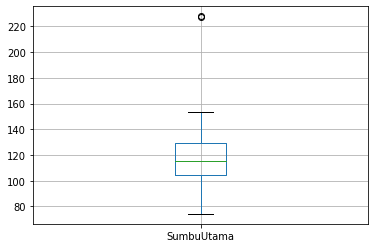

In [223]:
data.boxplot(["SumbuUtama"])
plt.show()

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: μ_{SumbuUtama} = 116$ <br> 
2. Hipotesis alternatif $H_{1}: μ_{SumbuUtama} ≠ 116$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Uji statistik menggunakan rumus pencarian nilai z sebagai berikut. <br>
$\;\;\;\;\;\;z= \Large\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt n}}$ <br>

In [224]:
alpha = 0.05
cpoint = getCPoint(alpha,"!=")
cRegion = criticalRegion(cpoint,"!=")

Derah kritis terletak pada z < -1.959963984540054 dan z > 1.959963984540054.

In [225]:
display(Markdown("5. Menghitung Nilai Uji Statistik z dan p-value"))
zSumbuUtama = countZ("SumbuUtama",116)
pvalue = countPV(zSumbuUtama,"!=")

5. Menghitung Nilai Uji Statistik z dan p-value

x̄̅ = 116.04517136778
σ = 18.28262595755935
n = 500
Maka, z = 0.05524712326730106.
p-value = 2P(z > 0.05524712326730106) = 0.9559415872977521


In [226]:
display(Markdown("6. Keputusan"))
cekZ(zSumbuUtama,cRegion)
cekP(pvalue,alpha)

6. Keputusan

Karena z tidak berada pada daerah kritis, maka __$H_{0}$ diterima.__

Karena p-value >= α, maka __$H_{0}$ diterima.__

Kesimpulan: $μ_{SumbuUtama} = 116$

 #### 4.c. Pengujian Terhadap $μ_{SumbuKecil} ≠ 50$ untuk 20 baris pertama

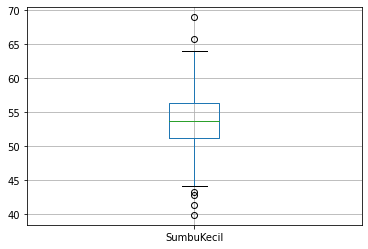

In [227]:
data.boxplot(["SumbuKecil"][:20])
plt.show()

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: μ_{SumbuKecil[:20]} = 50$ <br> 
2. Hipotesis alternatif $H_{1}: μ_{SumbuKecil[:20]} ≠ 50$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Uji statistik menggunakan rumus pencarian nilai z sebagai berikut. <br>
$\;\;\;\;\;\;z= \Large\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt n}}$ <br>

In [228]:
alpha = 0.05
cpoint = getCPoint(alpha,"!=")
cRegion = criticalRegion(cpoint,"!=")

Derah kritis terletak pada z < -1.959963984540054 dan z > 1.959963984540054.

In [229]:
display(Markdown("5. Menghitung Nilai Uji Statistik z dan p-value"))
#Untuk kasus ini, sampel yang digunakan adalah 20 baris pertama dari kolom SumbulKecil
mu = 50
mean = data["SumbuKecil"][:20].mean()
print("x̄̅ = " + str(mean))
std = data["SumbuKecil"][:20].std()
print("σ = " + str(std))
count = data["SumbuKecil"][:20].count()
print("n = " + str(count))
zSumbuKecil = (mean-mu)/(std/(count**0.5)) 
print("Maka, z = " + str(zSumbuKecil) + ".")
pvalue = countPV(zSumbuKecil,"!=")

5. Menghitung Nilai Uji Statistik z dan p-value

x̄̅ = 54.8872762605
σ = 3.3738798982760296
n = 20
Maka, z = 6.478168916968894.
p-value = 2P(z > 6.478168916968894) = 9.284240043427872e-11


In [230]:
display(Markdown("6. Keputusan"))
cekZ(zSumbuKecil,cRegion)
cekP(pvalue,alpha)

6. Keputusan

Karena z berada di daerah kritis, maka __$H_{0}$ ditolak.__

Karena p-value < α, maka __$H_{0}$ ditolak.__

Kesimpulan: $μ_{SumbuKecil[:20]} ≠ 50$ 

In [231]:
#DEKLARASI FUNGSI YANG DIBUTUHKAN 

def countZ2(kol,x,p0,opr):
    #menghitung nilai z berdasarkan data statistik dan proporsi nilai
    sample = data[kol]
    if opr == "<":
        filter = sample[sample<x]
        count = filter.count()
        print("Banyaknya data " + str(kol) + " > " + str(x) + " adalah " + str(count) + ".")
    elif opr == ">":
        filter = sample[sample>x]
        count = filter.count()
        print("Banyaknya data " + str(kol) + " > " + str(x) + " adalah " + str(count) + ".")
    print("Banyaknya sampel data adalah " + str(sample.count()) + ".")
    p = count/sample.count()
    print("Maka, p̂ = " + str(p) + ".")
    print("po = " + str(p0))
    n = sample.count()
    print("n = " + str(n))
    z = (p-p0)/(p0*(1-p0)/n)**0.5
    print("Maka, z = " + str(z) + ".")
    return z
    

 #### 4.d. Pengujian Terhadap $P(Diameter > 85) ≠ 15\%$

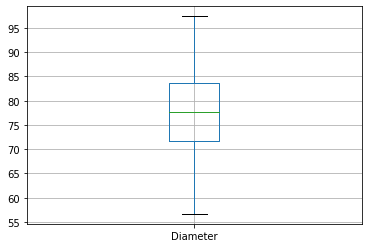

In [232]:
data.boxplot(["Diameter"])
plt.show()

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: P(Diameter > 85) = 15\%$ <br> 
2. Hipotesis alternatif $H_{1}: P(Diameter > 85) ≠ 15\%$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Uji statistik menggunakan rumus pencarian nilai z sebagai berikut. <br>
$\;\;\;\;\;\;z = \Large\frac{\hat{p} - p_{\normalsize0}}{\sqrt{\frac{p_{\normalsize0}(1 - p_{\normalsize0})}{n}}}$ <br>

In [233]:
alpha = 0.05
cpoint = getCPoint(alpha,"!=")
cRegion = criticalRegion(cpoint,"!=")

Derah kritis terletak pada z < -1.959963984540054 dan z > 1.959963984540054.

In [234]:
display(Markdown("5. Menghitung Nilai Uji Statistik z dan p-value"))
zDiameter = countZ2("Diameter",85,0.15,">")
pvalue = countPV(zDiameter,"!=")

5. Menghitung Nilai Uji Statistik z dan p-value

Banyaknya data Diameter > 85 adalah 97.
Banyaknya sampel data adalah 500.
Maka, p̂ = 0.194.
po = 0.15
n = 500
Maka, z = 2.755386880774658.
p-value = 2P(z > 2.755386880774658) = 0.005862277168409591


In [235]:
display(Markdown("6. Keputusan"))
cekZ(zDiameter,cRegion)
cekP(pvalue,alpha)

6. Keputusan

Karena z berada di daerah kritis, maka __$H_{0}$ ditolak.__

Karena p-value < α, maka __$H_{0}$ ditolak.__

Kesimpulan: $P(Diameter > 85) ≠ 15\%$

 #### 4.e. Pengujian Terhadap $P(Keliling < 100) < 5\%$

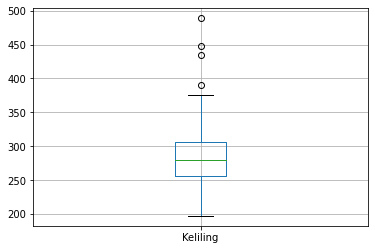

In [236]:
data.boxplot(["Keliling"])
plt.show()

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: P(Keliling < 100) = 5\%$ <br> 
2. Hipotesis alternatif $H_{1}: P(Keliling < 100) < 5\%$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Uji statistik menggunakan rumus pencarian nilai z sebagai berikut. <br>
$\;\;\;\;\;\;z = \Large\frac{\hat{p} - p_{\normalsize0}}{\sqrt{\frac{p_{\normalsize0}(1 - p_{\normalsize0})}{n}}}$ <br>

In [237]:
alpha = 0.05
cpoint = getCPoint(alpha,"<")
cRegion = criticalRegion(cpoint,"<")

Derah kritis terletak pada z < -1.6448536269514729.

In [238]:
display(Markdown("5. Menghitung Nilai Uji Statistik z dan p-value"))
zKeliling = countZ2("Keliling",100,0.05,"<")
pvalue = countPV(zKeliling,"<")

5. Menghitung Nilai Uji Statistik z dan p-value

Banyaknya data Keliling > 100 adalah 0.
Banyaknya sampel data adalah 500.
Maka, p̂ = 0.0.
po = 0.05
n = 500
Maka, z = -5.129891760425771.
p-value = P(z < -5.129891760425771) = 1.4495441414387716e-07


In [239]:
display(Markdown("6. Keputusan"))
cekZ(zKeliling,cRegion)
cekP(pvalue,alpha)

6. Keputusan

Karena z berada di daerah kritis, maka __$H_{0}$ ditolak.__

Karena p-value < α, maka __$H_{0}$ ditolak.__

Kesimpulan: $P(Keliling < 100) < 5\%$

### 5. Tes Hipotesis 2 Sampel

In [240]:
#DEKLARASI FUNGSI/PROSEDUR YANG DIBUTUHKAN
def degreeFreedom(awal,akhir):
    #menghitung derajat kebebasan
    return awal.count()+akhir.count()-2

def countT(kol,d0):
    n1 = awal[kol].count()
    n2 = akhir[kol].count()
    xbar1 = awal[kol].mean()
    xbar2 = akhir[kol].mean()
    s1 = awal[kol].std()
    s2 = akhir[kol].std()
    print("x̄̅1 = " + str(xbar1))
    print("x̄̅2 = " + str(xbar2))
    print("σ1 = " + str(s1))
    print("σ2 = " + str(s2))
    print("n1 = " + str(n1))
    print("n2 = " + str(n2))
    t = ((xbar1-xbar2)-d0)/(s1**2/n1 + s2**2/n2)**(0.5)
    print("t =", t)
    return t

def getCPointT(alpha,df,opr):
    if opr==">":
        cpoint = st.t.ppf(1-alpha,df)
    elif opr=="<":
        cpoint = st.t.ppf(alpha,df)
    elif opr=="!=":
        cpoint = st.t.ppf(1-alpha/2,df)
        return cpoint

def criticalRegionT(cpoint,opr):
    #menghasilkan daerah kritis
    if opr==">":
        display(Markdown("Derah kritis terletak pada t > " + str(cpoint) + "."))
        return 1 #mengembalikan kode 1
    elif opr=="<":
        display(Markdown("Derah kritis terletak pada t < " + str(cpoint) + "."))
        return 2 #mengembalikan kode 2
    elif opr=="!=":
        display(Markdown("Derah kritis terletak pada t < -" + str(cpoint) + " dan t > " + str(cpoint) + "."))
        return 3 #mengembalikan kode 3
    
def cekT(t,criticalRegion):
    #mengecek apakah z berada di daerah kritis dan menghasilkan keputusan
    masuk = False
    if criticalRegion == 1:
        if t > cpoint:
            masuk = True
    elif criticalRegion == 2:
        if t < cpoint:
            masuk = True
    elif criticalRegion == 3:
        if t < -cpoint or t > cpoint:
            masuk = True
    if (masuk):       
        display(Markdown("Karena t berada di daerah kritis, maka __$H_{0}$ ditolak.__"))
    else:
        display(Markdown("Karena t tidak berada pada daerah kritis, maka __$H_{0}$ diterima.__"))


#### 5.a. Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

In [241]:
#VARIABEL
row = len(data.index)
mid = int(row/2)
awal = data.iloc[0:mid]
akhir = data.iloc[mid:row+1]

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: \mu_{AreaBulatan1} = \mu_{AreaBulatan2}$ <br> 
2. Hipotesis alternatif $H_{1}: \mu_{AreaBulatan1} \neq \mu_{AreaBulatan2}$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Digunakan uji two-tailed dengan rumus pencarian sebagai berikut. <br>
$t = \Large\frac{(\bar{X_1} - \bar{X_2})-(\mu_1 - \mu_2)}{\sqrt{\Large\frac{\sigma_1^2}{\Large n_{\ 1}} + \Large\frac{\sigma_2^2}{\Large n_{\large 2}}}}$ <br>

In [242]:
df = degreeFreedom(awal["AreaBulatan"],akhir["AreaBulatan"])
cpoint = getCPointT(alpha,df,"!=")
cRegion = criticalRegionT(cpoint,"!=")
display(Markdown("5. Penentuan nilai uji statistik"))
t = countT("AreaBulatan",0)

Derah kritis terletak pada t < -1.9647389829672648 dan t > 1.9647389829672648.

5. Penentuan nilai uji statistik

x̄̅1 = 5549.804
x̄̅2 = 4324.292
σ1 = 867.0254356176825
σ2 = 738.5664658199254
n1 = 250
n2 = 250
t = 17.013036648485464


In [243]:
display(Markdown("6. Keputusan"))
cekT(t,cRegion)

6. Keputusan

Karena t berada di daerah kritis, maka __$H_{0}$ ditolak.__

Kesimpulan: $\mu_{AreaBulatan1} \neq \mu_{AreaBulatan2}$ <br> 

#### 5.b. Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?

In [244]:
#VARIABEL
row = len(data.index)
mid = int(row/2)
awal = data.iloc[0:mid]
akhir = data.iloc[mid:row+1]

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: KadarAir_{awal} - KadarAir_{akhir} = 0.2$ <br> 
2. Hipotesis alternatif $H_{1}: KadarAir_{awal} - KadarAir_{akhir} \neq 0.2$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Digunakan uji two-tailed
Uji statistik menggunakan rumus pencarian sebagai berikut. <br>
$t = \Large\frac{(\bar{X_1} - \bar{X_2})-(\mu_1 - \mu_2)}{\sqrt{\Large\frac{\sigma_1^2}{\Large n_{\ 1}} + \Large\frac{\sigma_2^2}{\Large n_{\large 2}}}}$ <br>

In [245]:
df = degreeFreedom(awal["KadarAir"],akhir["KadarAir"])
cpoint = getCPointT(alpha,df,"!=")
cRegion = criticalRegionT(cpoint,"!=")
display(Markdown("5. Penentuan nilai uji statistik"))
t = countT("KadarAir",0.2)

Derah kritis terletak pada t < -1.9647389829672648 dan t > 1.9647389829672648.

5. Penentuan nilai uji statistik

x̄̅1 = 0.63574344072
x̄̅2 = 0.660999903076
σ1 = 0.0950957414770849
σ2 = 0.09210123051767877
n1 = 250
n2 = 250
t = -26.903444249744943


In [246]:
display(Markdown("6. Keputusan"))
cekT(t,cRegion)

6. Keputusan

Karena t berada di daerah kritis, maka __$H_{0}$ ditolak.__

Kesimpulan: $KadarAir_{awal} - KadarAir_{akhir} \neq 0.2$

#### 5.c. Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?

In [247]:
n = len(data.index)
end = n - 20
awal = data.iloc[0:20]
akhir = data.iloc[end:n+1]

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: \mu_{Bulatan1} = \mu_{Bulatan2}$ <br> 
2. Hipotesis alternatif $H_{1}: \mu_{Bulatan1} \neq \mu_{Bulatan2}$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Digunakan uji two-tailed
Uji statistik menggunakan rumus pencarian sebagai berikut. <br>
$t = \Large\frac{(\bar{X_1} - \bar{X_2})-(\mu_1 - \mu_2)}{\sqrt{\Large\frac{\sigma_1^2}{\Large n_{\ 1}} + \Large\frac{\sigma_2^2}{\Large n_{\large 2}}}}$ <br>

In [248]:
df = degreeFreedom(awal["Bulatan"],akhir["Bulatan"])
cpoint = getCPointT(alpha,df,"!=")
cRegion = criticalRegionT(cpoint,"!=")
display(Markdown("5. Penentuan nilai uji statistik"))
t = countT("Bulatan",0)

Derah kritis terletak pada t < -2.024394164575136 dan t > 2.024394164575136.

5. Penentuan nilai uji statistik

x̄̅1 = 0.73753535525
x̄̅2 = 0.767322437
σ1 = 0.03038477583561707
σ2 = 0.025115057347653777
n1 = 20
n2 = 20
t = -3.3792268633123896


In [249]:
display(Markdown("6. Keputusan"))
cekT(t,cRegion)

6. Keputusan

Karena t berada di daerah kritis, maka __$H_{0}$ ditolak.__

Kesimpulan: $\mu_{Bulatan1} \neq \mu_{Bulatan2}$

#### 5.d. Proporsi nilai bagian awal Ransum yang lebih dari $2$, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?

In [250]:
# VARIABLE
n = len(data.index)
mid = int(n/2)
awal = data['Ransum'].iloc[1:mid]
akhir = data['Ransum'].iloc[(mid+1):n]
awal_filter = [] 
akhir_filter = []
for i in range(len(awal.index)): 
    if (awal.iloc[i] > 2): 
        awal_filter.append(awal.iloc[i])

for i in range(len(akhir.index)):
    if (akhir.iloc[i] > 2): 
        akhir_filter.append(akhir.iloc[i])

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: P(Ransum_{awal} > 2) = P(Ransum_{akhir} > 2)$ <br> 
2. Hipotesis alternatif $H_{1}: P(Ransum_{awal} > 2) > P(Ransum_{akhir} > 2)$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Digunakan uji two-tailed menggunakan rumus sebagai berikut. <br>
$t = \Large\frac{(\hat{p}_1 - \hat{p}_2) - (p_1 - p_2)}{\sqrt{\hat{p}_c(1-\hat{p}_c)(\frac{1}{n_1} + \frac{1}{n_2})}}$ <br>

$\hat{p}_c = \Large\frac{x_1 + x_2}{n_1 + n_2}$ <br> 

In [251]:
p1 = len(awal_filter) / 250
p2 = len(akhir_filter) / 250
pc = p1 + p2 / 500
t = (p1-p2)/(pc*(1-pc)/125)**(0.5)

df = degreeFreedom(pd.Series(awal_filter),pd.Series(akhir_filter))
cpoint = getCPointT(alpha,df,"!=")
cRegion = criticalRegionT(cpoint,"!=")
display(Markdown("5. Penentuan nilai uji statistik"))
print("t = " + str(t))

Derah kritis terletak pada t < -1.9665388125098338 dan t > 1.9665388125098338.

5. Penentuan nilai uji statistik

t = 70.44641942841027


In [252]:
display(Markdown("6. Keputusan"))
cekT(t,cRegion)

6. Keputusan

Karena t berada di daerah kritis, maka __$H_{0}$ ditolak.__

Kesimpulan: $P(Ransum_{awal} > 2) > P(Ransum_{akhir} > 2)$

#### 5.e.  Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?

In [253]:
# VARIABLE
n = len(data.index)
mid = n/2
awal = data['Diameter'].iloc[1:int(mid)] # data bagian awal
akhir = data['Diameter'].iloc[int(mid+1):n] # data bagian akhir

__Langkah Pengujian__ <br>
1. Hipotesis nol $H_{0}: \sigma^2_{Diameter1} = \sigma^2_{Diameter2}$ <br> 
2. Hipotesis alternatif $H_{1}: \sigma^2_{Diameter1} \neq \sigma^2_{Diameter2}$ <br> 
3. Tingkat signifikan $α = 0.05$
4. Uji Statistik dan Daerah Kritis<br>
Digunakan uji two-tailed
Uji statistik menggunakan rumus pencarian sebagai berikut. <br>
$F_c = \Large\frac{\sigma_2^2}{\sigma_1^2}$

In [254]:
s1 = awal.std()
s2 = akhir.std()
F = s2**2/s1**2
fc = scipy.stats.f.ppf(q=0.975, dfn=249, dfd=249)
clower = 1/fc
cupper = fc
display(Markdown("Daerah kritis terletak pada c < " + str(clower) + " atau " + " c > " + str(cupper)))
display(Markdown("5. Penentuan nilai uji statistik"))
print("Fc =", F)


Daerah kritis terletak pada c < 0.7795916576054988 atau  c > 1.2827228078241388

5. Penentuan nilai uji statistik

Fc = 0.9089761525466793


6. Keputusan <br>
Karena $Fc$ tidak berada pada daerah kritis, maka __$H_{0}$ diterima.__

Kesimpulan: $\sigma^2_{Diameter1} = \sigma^2_{Diameter2}$

### 6. Tes Korelasi

Apabila nilai korelasi mendekati 0, kedua kolom tidak berkorelasi. <br>
Apabila nilai korelasi mendekati 1, kedua kolom berbanding lurus. <br>
Apabila nilai korelasi mendekati -1, kedua kolom berbanding terbalik. <br>

In [255]:
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [256]:
#DEKLARASI FUNGSI/PROSEDUR YANG DIBUTUHKAN

def scatter(kol1):
    #menampilkan diagram scatterplot dan menunjukkan garis regresi linear antara kolom non-target dengan kolom target
    display(Markdown("Scatterplot " + kol1 + " dengan Kelas"))
    sns.regplot(data[kol1],data['Kelas'])
    
def min3(a,b,c):
    #mengembalikan 0 apabila a minimal, 1 apabila b minimal, 2 apabila c minimal
    if a<b:
        if a<c:
            return 0
        else:
            return 2
    else:
        if b<c:
            return 1
        else:
            return 2
        
def korelasi(kol1):
    #menampilkan nilai korelasi antara kol1 dengan Kelas serta jenis kolerasinya
    kor = data[kol1].corr(data['Kelas'])
    display(Markdown("Nilai korelasi antara " + kol1 + " dengan Kelas adalah = " + str(kor)))
    diff0 = abs(kor)
    diff1 = abs(kor-1)
    diffmin1 = abs(kor+1)
    hsl = min3(diff0,diff1,diffmin1)
    if hsl==0:
        display(Markdown("Maka, keduanya tidak berkolerasi."))
    elif hsl==1:
        display(Markdown("Maka, keduanya memiliki korelasi yang berbanding lurus."))
                
    else: #hsl==2
        display(Markdown("Maka, keduanya memiliki korelasi yang berbanding terbalik."))

#### Korelasi Daerah dengan Kelas 

Scatterplot Daerah dengan Kelas

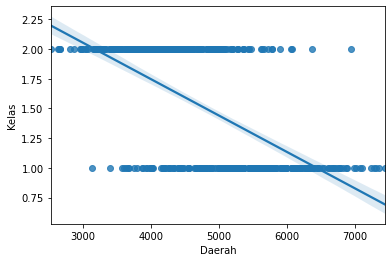

In [257]:
scatter("Daerah")

In [258]:
korelasi("Daerah")

Nilai korelasi antara Daerah dengan Kelas adalah = -0.6027466517416661

Maka, keduanya memiliki korelasi yang berbanding terbalik.

#### Korelasi SumbuUtama dengan Kelas 

Scatterplot SumbuUtama dengan Kelas

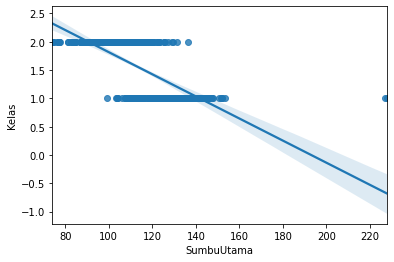

In [259]:
scatter("SumbuUtama")

In [260]:
korelasi("SumbuUtama")

Nilai korelasi antara SumbuUtama dengan Kelas adalah = -0.7130906104204594

Maka, keduanya memiliki korelasi yang berbanding terbalik.

#### Korelasi SumbuKecil dengan Kelas

Scatterplot SumbuKecil dengan Kelas

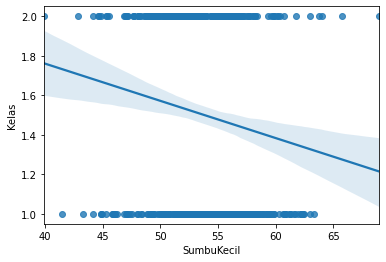

In [261]:
scatter("SumbuKecil")

In [262]:
korelasi("SumbuKecil")

Nilai korelasi antara SumbuKecil dengan Kelas adalah = -0.1529751733553502

Maka, keduanya tidak berkolerasi.

#### Korelasi Keunikan dengan Kelas 

Scatterplot Keunikan dengan Kelas

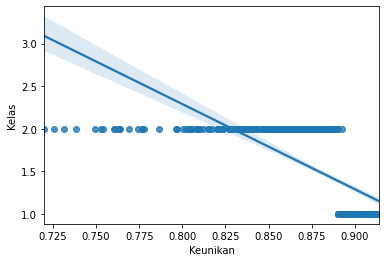

In [263]:
scatter("Keunikan")

In [264]:
korelasi("Keunikan")

Nilai korelasi antara Keunikan dengan Kelas adalah = -0.7304563686511925

Maka, keduanya memiliki korelasi yang berbanding terbalik.

#### Korelasi AreaBulatan dengan Kelas

Scatterplot AreaBulatan dengan Kelas

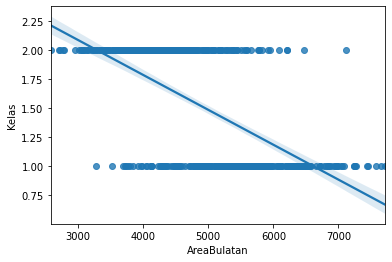

In [265]:
scatter("AreaBulatan")

In [266]:
korelasi("AreaBulatan")

Nilai korelasi antara AreaBulatan dengan Kelas adalah = -0.6073125434153749

Maka, keduanya memiliki korelasi yang berbanding terbalik.

#### Korelasi Diameter dengan Kelas

Scatterplot Diameter dengan Kelas

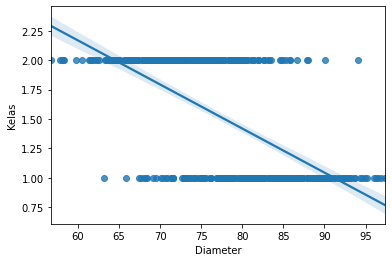

In [267]:
scatter("Diameter")

In [268]:
korelasi("Diameter")

Nilai korelasi antara Diameter dengan Kelas adalah = -0.6025356896618809

Maka, keduanya memiliki korelasi yang berbanding terbalik.

#### Korelasi KadarAir dengan Kelas

Scatterplot KadarAir dengan Kelas

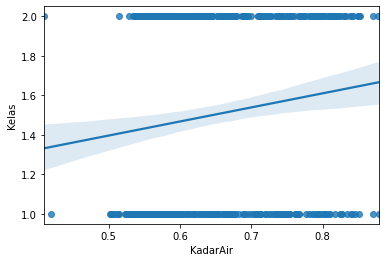

In [269]:
scatter("KadarAir")

In [270]:
korelasi("KadarAir")

Nilai korelasi antara KadarAir dengan Kelas adalah = 0.13434422605727636

Maka, keduanya tidak berkolerasi.

#### Korelasi Keliling dengan Kelas

Scatterplot Keliling dengan Kelas

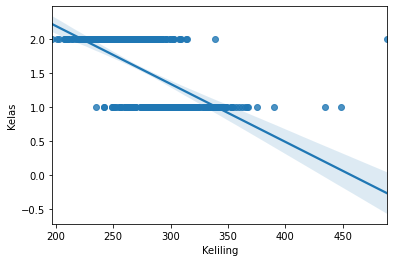

In [271]:
scatter("Keliling")

In [272]:
korelasi("Keliling")

Nilai korelasi antara Keliling dengan Kelas adalah = -0.6348607454756853

Maka, keduanya memiliki korelasi yang berbanding terbalik.

#### Korelasi Bulatan dengan Kelas

Scatterplot Bulatan dengan Kelas

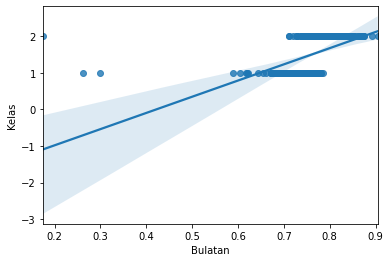

In [273]:
scatter("Bulatan")

In [274]:
korelasi("Bulatan")

Nilai korelasi antara Bulatan dengan Kelas adalah = 0.5450045317240069

Maka, keduanya memiliki korelasi yang berbanding lurus.

#### Korelasi Ransum dengan Kelas

Scatterplot Ransum dengan Kelas

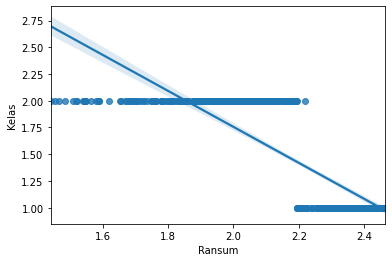

In [275]:
scatter("Ransum")

In [276]:
korelasi("Ransum")

Nilai korelasi antara Ransum dengan Kelas adalah = -0.8399038681287486

Maka, keduanya memiliki korelasi yang berbanding terbalik.